In [1]:
# IMPORT NECESSARY LIBRARIES
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
from scipy import stats
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format

### DATA IMPORT AND UNDERSTANDING

In [2]:
df = pd.read_csv(r"C:\Users\meada\OneDrive\Desktop\PGDP DS\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [6]:
df.isnull().sum()/len(df)*100

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

1. Multiple columns have null values. We need to handle them.
2. Prospect ID and Lead Number both are ideally unique keys that identify individual leads. So one can be dropped.
3. Sales generated column can also be removed -- tags, last activity and last notable activity 
4. Column names are not in correct format -- spaces between the words, long column names etc..
5. Column values 'Select' as this is a drop down value from the form that leads fill and are ideally nulls. 

In [7]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [8]:
print(df.columns)

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')


In [9]:
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_notification', 
                     'update_me_on_supply_chain_content': 'supply_chain_notification',
                    'get_updates_on_dm_content': 'dm_content_notification',
                    'i_agree_to_pay_the_amount_through_cheque': 'payment_cheque',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_notification,tags,lead_quality,supply_chain_notification,dm_content_notification,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,payment_cheque,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [10]:
df.drop(['prospect_id'], axis=1, inplace=True)

In [11]:
df = df.replace('Select',np.nan)

In [12]:
df.isnull().sum()/len(df)*100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
last_activity                  1.11
country                       26.63
specialization                36.58
source                        78.46
occupation                    29.11
course_selection_reason       29.32
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_notification           0.00
tags                          36.29
lead_quality                  51.59
supply_chain_notification      0.00
dm_content_notification        0.00
lead_profile                

Since from the above list we can see quite a lot of variables with missing values lets drop the columns that have more than 40% missing values

In [13]:
df.drop(['source','lead_quality','lead_profile','asymmetrique_activity_index','asymmetrique_profile_index','asymmetrique_activity_score','asymmetrique_profile_score'], axis=1, inplace=True)

In [14]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_notification,tags,supply_chain_notification,dm_content_notification,city,payment_cheque,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
df.isnull().sum()/len(df)*100

lead_number                  0.00
lead_origin                  0.00
lead_source                  0.39
do_not_email                 0.00
do_not_call                  0.00
converted                    0.00
total_visits                 1.48
time_on_website              0.00
page_views_per_visit         1.48
last_activity                1.11
country                     26.63
specialization              36.58
occupation                  29.11
course_selection_reason     29.32
search                       0.00
magazine                     0.00
newspaper_article            0.00
x_education_forums           0.00
newspaper                    0.00
digital_advertisement        0.00
through_recommendations      0.00
courses_notification         0.00
tags                        36.29
supply_chain_notification    0.00
dm_content_notification      0.00
city                        39.71
payment_cheque               0.00
mastering_interview          0.00
last_notable_activity        0.00
dtype: float64

Country, occupation, course selection reason, city are columns that have more missing values. Lets look at these columns and figure out the issue

In [16]:
df['country'].value_counts(dropna=False)

country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Since the value is skewed to one country we can drop this column

In [17]:
df.drop('country', axis = 1, inplace = True)

In [18]:
df['specialization'].value_counts(dropna=False)

specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

The huge number of nulls in this column can be caused because of customers not choosing one specilization as it was not part of the list provided in the form. So we can move all the nan to 'Not Specified'

In [19]:
df['specialization'] = df['specialization'].replace(np.nan, 'Not Specified')

In [20]:
df.specialization.value_counts(dropna=False)

specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [21]:
df.occupation.value_counts(dropna=False)

occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

We can assign unemployed category to nan 

In [22]:
df['occupation'] = df['occupation'].replace(np.nan, 'Unemployed')

In [23]:
df.occupation.value_counts(dropna=False)

occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [24]:
df.course_selection_reason.value_counts(dropna=False)

course_selection_reason
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
df['course_selection_reason'] = df['course_selection_reason'].replace(np.nan, 'Better Career Prospects')

In [26]:
df.course_selection_reason.value_counts(dropna=False)

course_selection_reason
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

This has now made the column skwed to one value so this can be removed from our data

In [27]:
df.drop('course_selection_reason', axis=1, inplace=True)

In [28]:
df.city.value_counts(dropna=False)

city
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [29]:
df['city'] = df['city'].replace(np.nan,'Mumbai')

In [30]:
df.isnull().sum()

lead_number                     0
lead_origin                     0
lead_source                    36
do_not_email                    0
do_not_call                     0
converted                       0
total_visits                  137
time_on_website                 0
page_views_per_visit          137
last_activity                 103
specialization                  0
occupation                      0
search                          0
magazine                        0
newspaper_article               0
x_education_forums              0
newspaper                       0
digital_advertisement           0
through_recommendations         0
courses_notification            0
tags                         3353
supply_chain_notification       0
dm_content_notification         0
city                            0
payment_cheque                  0
mastering_interview             0
last_notable_activity           0
dtype: int64

In [31]:
df['tags'].value_counts(dropna=False)

tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"

In [32]:
#Changing Nan values in Tag with "Not Specified"
df['tags'] = df['tags'].replace(np.nan,'Not Specified')

In [33]:
df.tags.value_counts()

tags
Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [34]:
df['tags'] = df['tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lead_number                9240 non-null   int64  
 1   lead_origin                9240 non-null   object 
 2   lead_source                9204 non-null   object 
 3   do_not_email               9240 non-null   object 
 4   do_not_call                9240 non-null   object 
 5   converted                  9240 non-null   int64  
 6   total_visits               9103 non-null   float64
 7   time_on_website            9240 non-null   int64  
 8   page_views_per_visit       9103 non-null   float64
 9   last_activity              9137 non-null   object 
 10  specialization             9240 non-null   object 
 11  occupation                 9240 non-null   object 
 12  search                     9240 non-null   object 
 13  magazine                   9240 non-null   objec

In [36]:
df.isnull().sum()

lead_number                    0
lead_origin                    0
lead_source                   36
do_not_email                   0
do_not_call                    0
converted                      0
total_visits                 137
time_on_website                0
page_views_per_visit         137
last_activity                103
specialization                 0
occupation                     0
search                         0
magazine                       0
newspaper_article              0
x_education_forums             0
newspaper                      0
digital_advertisement          0
through_recommendations        0
courses_notification           0
tags                           0
supply_chain_notification      0
dm_content_notification        0
city                           0
payment_cheque                 0
mastering_interview            0
last_notable_activity          0
dtype: int64

In [37]:
df['last_activity'].value_counts(dropna=False)

last_activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [38]:
df['last_activity'] = df['last_activity'].replace(np.nan,'Others')

In [39]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis

df['last_activity'] = df['last_activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [40]:
df['last_activity'].value_counts(dropna=False)

last_activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [41]:
df['last_notable_activity'].value_counts()

last_notable_activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [42]:
df['last_notable_activity'] = df['last_notable_activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

Handle missing values for remaining columns

In [43]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [44]:
categorical_columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'specialization', 'occupation', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'courses_notification', 'tags', 'supply_chain_notification',
       'dm_content_notification', 'city', 'payment_cheque',
       'mastering_interview', 'last_notable_activity'],
      dtype='object')

In [45]:
unique_counts = df[categorical_columns].nunique()

In [46]:
print(unique_counts)

lead_origin                   5
lead_source                  21
do_not_email                  2
do_not_call                   2
last_activity                 9
specialization               19
occupation                    6
search                        2
magazine                      1
newspaper_article             2
x_education_forums            2
newspaper                     2
digital_advertisement         2
through_recommendations       2
courses_notification          1
tags                          8
supply_chain_notification     1
dm_content_notification       1
city                          6
payment_cheque                1
mastering_interview           2
last_notable_activity         7
dtype: int64


In [47]:
df['lead_source'].value_counts(dropna=False)

lead_source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Lead source and Lead origin are columns that have more than 2 values. Lets take a look and handle them. 
Since Lead source has very less null values, we can replace Null as Others and group the categories together

In [48]:
df['lead_source'] = df['lead_source'].replace(np.nan,'Others')

In [49]:
df['lead_source'] = df['lead_source'].replace('google','Google')
df['lead_source'] = df['lead_source'].replace('Facebook','Social Media')
df['lead_source'] = df['lead_source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [50]:
df['lead_source'].value_counts()

lead_source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64

In [51]:
df.lead_origin.value_counts()

lead_origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [52]:
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form'), 'lead_origin'] = 'Lead Add Form and Others'

In [53]:
df.lead_origin.value_counts()

lead_origin
Landing Page Submission     4886
API                         3580
Lead Add Form and Others     774
Name: count, dtype: int64

The columns that have only one value can be dropped as it is not significant for our analysis

In [54]:
print(unique_counts)

lead_origin                   5
lead_source                  21
do_not_email                  2
do_not_call                   2
last_activity                 9
specialization               19
occupation                    6
search                        2
magazine                      1
newspaper_article             2
x_education_forums            2
newspaper                     2
digital_advertisement         2
through_recommendations       2
courses_notification          1
tags                          8
supply_chain_notification     1
dm_content_notification       1
city                          6
payment_cheque                1
mastering_interview           2
last_notable_activity         7
dtype: int64


magazine, courses_notification, supply_chain_notification,dm_content_notification,payment_cheque can be removed

In [55]:
df.drop(['magazine', 'courses_notification', 
           'supply_chain_notification', 'dm_content_notification', 'payment_cheque'], axis = 1, inplace = True)

In [56]:
categorical_columns = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]


In [57]:
def calculate_frequencies_and_percentages(df, columns):
    result = {}
    
    for col in columns:
        value_counts = df[col].value_counts()
        total_count = value_counts.sum()
        percentages = (value_counts / total_count) * 100
        df_summary = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': percentages.values
        })
        
        result[col] = df_summary
    
    return result

results = calculate_frequencies_and_percentages(df, categorical_columns)

for col, summary in results.items():
    print(f"Column: {col}")
    print(summary)
    print()

Column: do_not_email
  Value  Count  Percentage
0    No   8506       92.06
1   Yes    734        7.94

Column: do_not_call
  Value  Count  Percentage
0    No   9238       99.98
1   Yes      2        0.02

Column: search
  Value  Count  Percentage
0    No   9226       99.85
1   Yes     14        0.15

Column: newspaper_article
  Value  Count  Percentage
0    No   9238       99.98
1   Yes      2        0.02

Column: x_education_forums
  Value  Count  Percentage
0    No   9239       99.99
1   Yes      1        0.01

Column: newspaper
  Value  Count  Percentage
0    No   9239       99.99
1   Yes      1        0.01

Column: digital_advertisement
  Value  Count  Percentage
0    No   9236       99.96
1   Yes      4        0.04

Column: through_recommendations
  Value  Count  Percentage
0    No   9233       99.92
1   Yes      7        0.08

Column: mastering_interview
  Value  Count  Percentage
0    No   6352       68.74
1   Yes   2888       31.26



We can drop the columns that have huge data imbalance

In [58]:
df.drop(['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations'],axis=1,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_number            9240 non-null   int64  
 1   lead_origin            9240 non-null   object 
 2   lead_source            9240 non-null   object 
 3   do_not_email           9240 non-null   object 
 4   converted              9240 non-null   int64  
 5   total_visits           9103 non-null   float64
 6   time_on_website        9240 non-null   int64  
 7   page_views_per_visit   9103 non-null   float64
 8   last_activity          9240 non-null   object 
 9   specialization         9240 non-null   object 
 10  occupation             9240 non-null   object 
 11  tags                   9240 non-null   object 
 12  city                   9240 non-null   object 
 13  mastering_interview    9240 non-null   object 
 14  last_notable_activity  9240 non-null   object 
dtypes: f

Lets clean the columns to reflect the correct data types

Lead_number is a column that uniquely identifies each leads and it should not be a integer

In [60]:
df.lead_number = df.lead_number.astype('object')

In [61]:
df.total_visits

0      0.00
1      5.00
2      2.00
3      1.00
4      2.00
       ... 
9235   8.00
9236   2.00
9237   2.00
9238   3.00
9239   6.00
Name: total_visits, Length: 9240, dtype: float64

total visits should be integer without decimals

In [62]:
df.total_visits.value_counts()

total_visits
0.00      2189
2.00      1680
3.00      1306
4.00      1120
5.00       783
6.00       466
1.00       395
7.00       309
8.00       224
9.00       164
10.00      114
11.00       86
13.00       48
12.00       45
14.00       36
16.00       21
15.00       18
17.00       16
18.00       15
20.00       12
19.00        9
21.00        6
23.00        6
24.00        5
25.00        5
27.00        5
22.00        3
29.00        2
28.00        2
26.00        2
141.00       1
55.00        1
30.00        1
43.00        1
74.00        1
41.00        1
54.00        1
115.00       1
251.00       1
32.00        1
42.00        1
Name: count, dtype: int64

In [63]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

In [64]:
df.total_visits.value_counts()

total_visits
0      2189
2      1680
3      1443
4      1120
5       783
6       466
1       395
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       16
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: count, dtype: int64

In [65]:
df.page_views_per_visit.isnull().sum()

137

In [66]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)
# df.page_views_per_visit = df.page_views_per_visit.astype('int')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_number            9240 non-null   object 
 1   lead_origin            9240 non-null   object 
 2   lead_source            9240 non-null   object 
 3   do_not_email           9240 non-null   object 
 4   converted              9240 non-null   int64  
 5   total_visits           9240 non-null   int32  
 6   time_on_website        9240 non-null   int64  
 7   page_views_per_visit   9240 non-null   float64
 8   last_activity          9240 non-null   object 
 9   specialization         9240 non-null   object 
 10  occupation             9240 non-null   object 
 11  tags                   9240 non-null   object 
 12  city                   9240 non-null   object 
 13  mastering_interview    9240 non-null   object 
 14  last_notable_activity  9240 non-null   object 
dtypes: f

In [68]:
df.page_views_per_visit

0      0.00
1      2.50
2      2.00
3      1.00
4      1.00
       ... 
9235   2.67
9236   2.00
9237   2.00
9238   3.00
9239   3.00
Name: page_views_per_visit, Length: 9240, dtype: float64

In [69]:
df.isnull().sum()

lead_number              0
lead_origin              0
lead_source              0
do_not_email             0
converted                0
total_visits             0
time_on_website          0
page_views_per_visit     0
last_activity            0
specialization           0
occupation               0
tags                     0
city                     0
mastering_interview      0
last_notable_activity    0
dtype: int64

### Exploratory Data Analysis

##### Categorical Variables

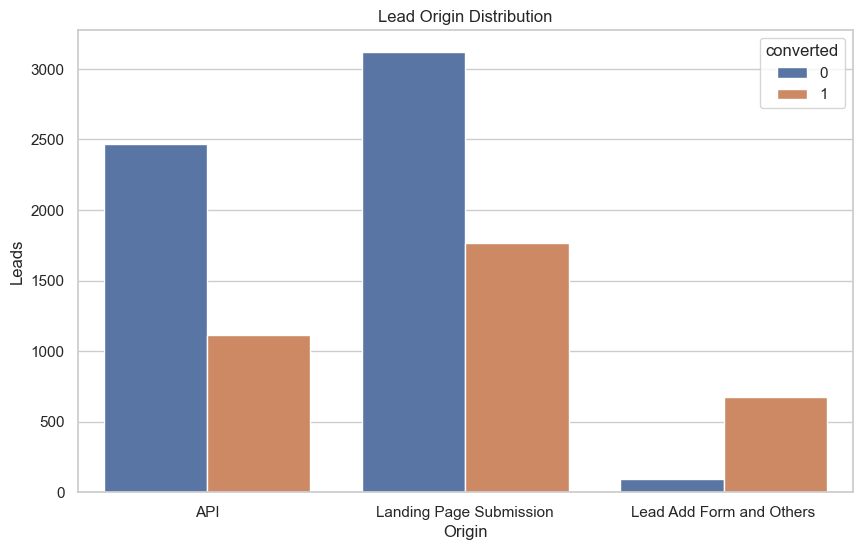

In [70]:
count_df = df.groupby(['lead_origin', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='lead_origin',y='Count',hue='converted',data=count_df)

plt.title('Lead Origin Distribution')
plt.xlabel('Origin')
plt.ylabel('Leads')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. API and Landing Page Submission bring more number of leads as well as conversion.
2. If we can make people to come till the lead add form then the rate of conversion can become high.

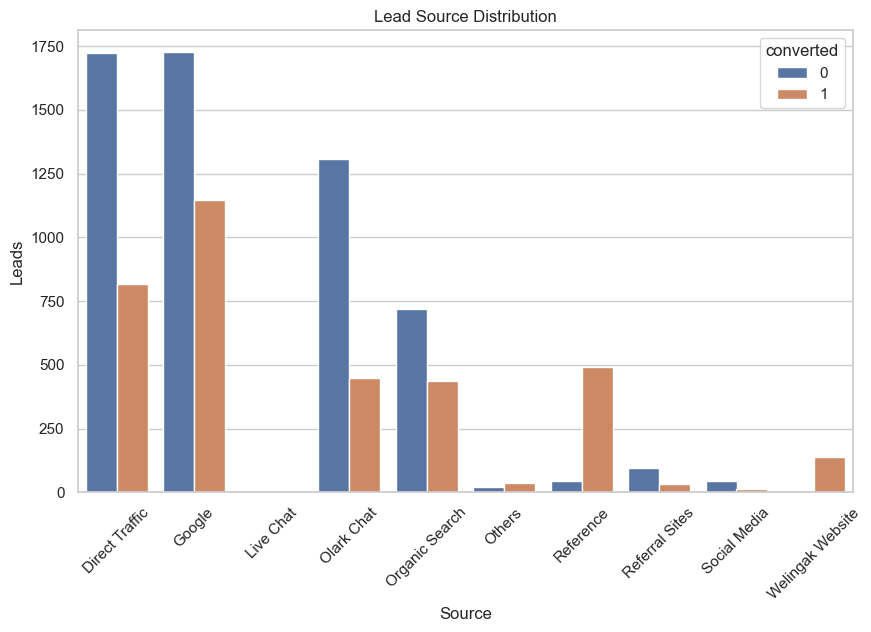

In [71]:
count_df = df.groupby(['lead_source', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='lead_source',y='Count',hue='converted',data=count_df)

plt.title('Lead Source Distribution')
plt.xlabel('Source')
plt.ylabel('Leads')
plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Direct traffic and google have generated the most number of leads
2. Live chat has the least generated leads
3. Welingak website has the highest conversion rate
4. Focussing on the highest lead generating category like Olark chat, Organic search, Direct traffic, and google leads may help in increasing the lead conversions

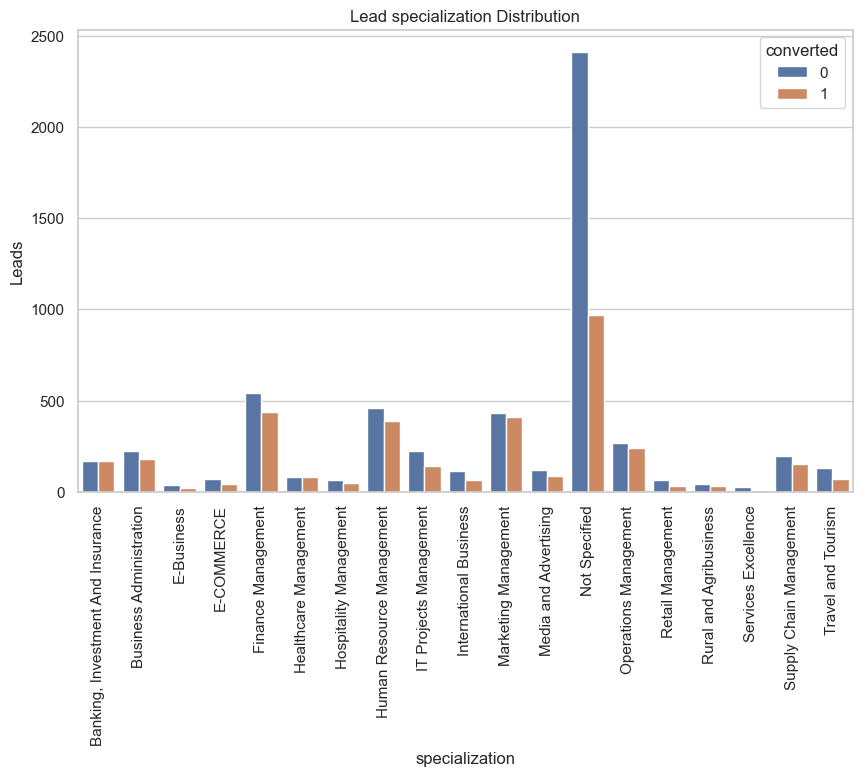

In [72]:
count_df = df.groupby(['specialization', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='specialization',y='Count',hue='converted',data=count_df)

plt.title('Lead specialization Distribution')
plt.xlabel('specialization')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ignoring the not specified category, Management is the most taken specification

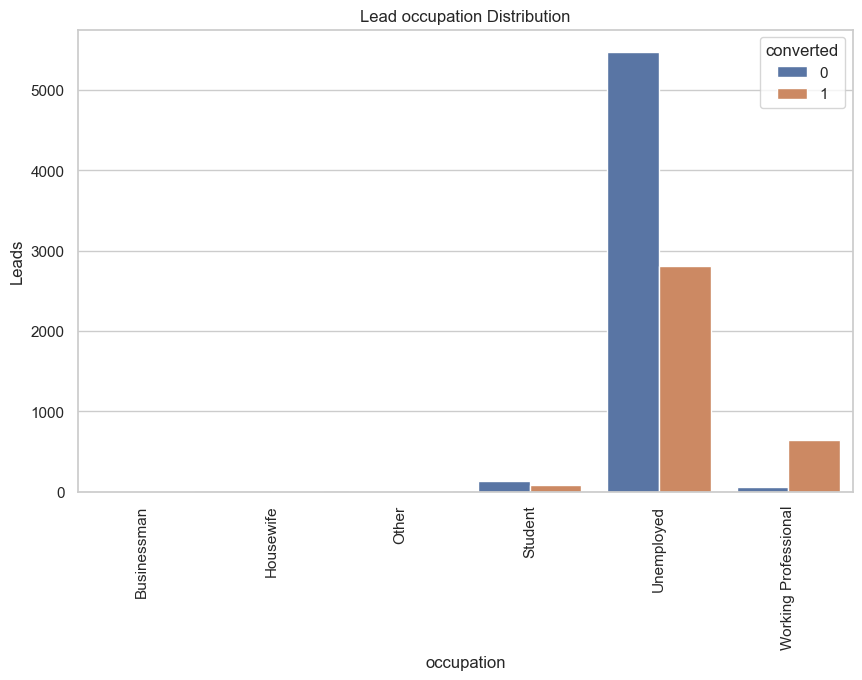

In [73]:
count_df = df.groupby(['occupation', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='occupation',y='Count',hue='converted',data=count_df)

plt.title('Lead occupation Distribution')
plt.xlabel('occupation')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Unemployed leads are the highest visitors
2. Working Professionals has the highest number of conversions

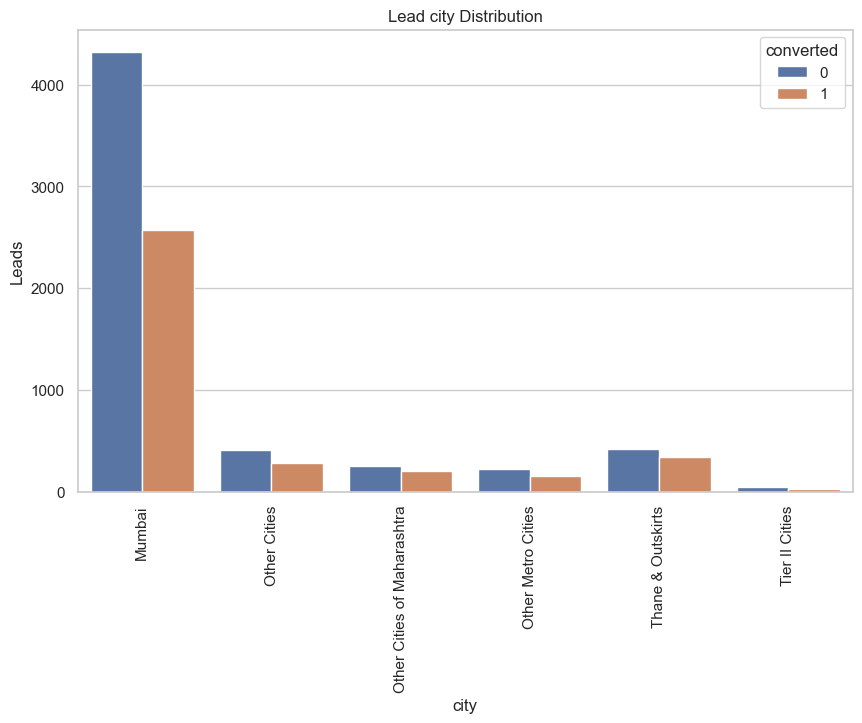

In [74]:
count_df = df.groupby(['city', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='city',y='Count',hue='converted',data=count_df)

plt.title('Lead city Distribution')
plt.xlabel('city')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mumbai is the most occuring city in this segment

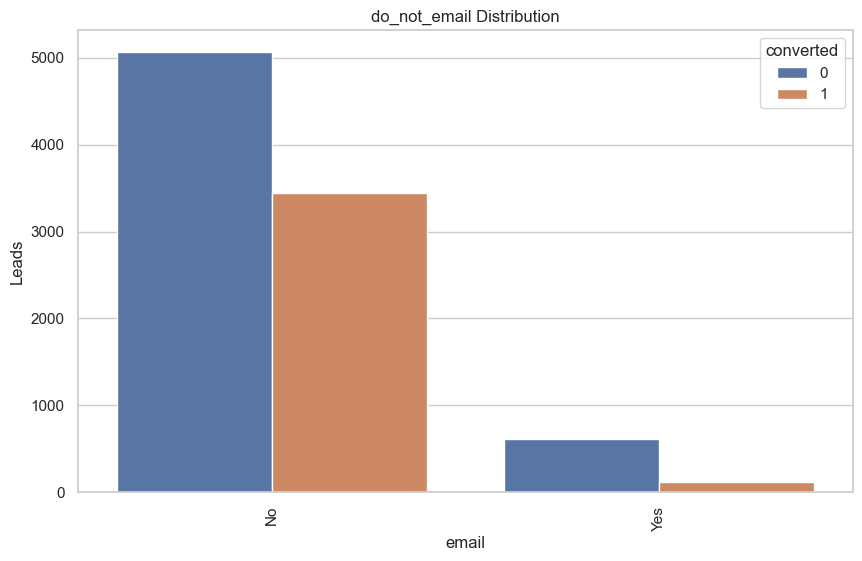

In [75]:
count_df = df.groupby(['do_not_email', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='do_not_email',y='Count',hue='converted',data=count_df)

plt.title('do_not_email Distribution')
plt.xlabel('email')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

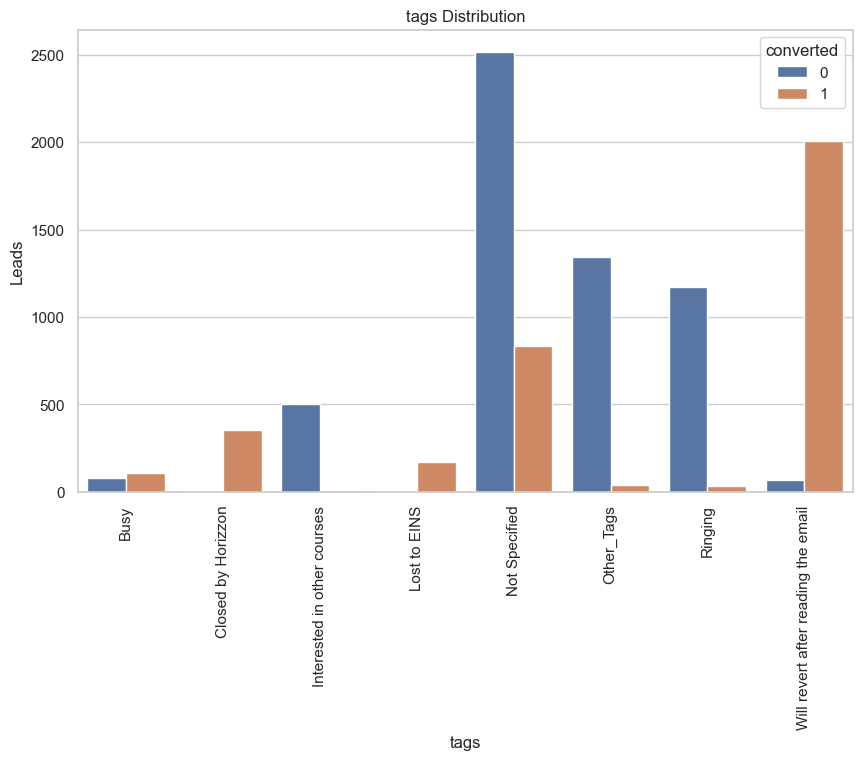

In [76]:
count_df = df.groupby(['tags', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='tags',y='Count',hue='converted',data=count_df)

plt.title('tags Distribution')
plt.xlabel('tags')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

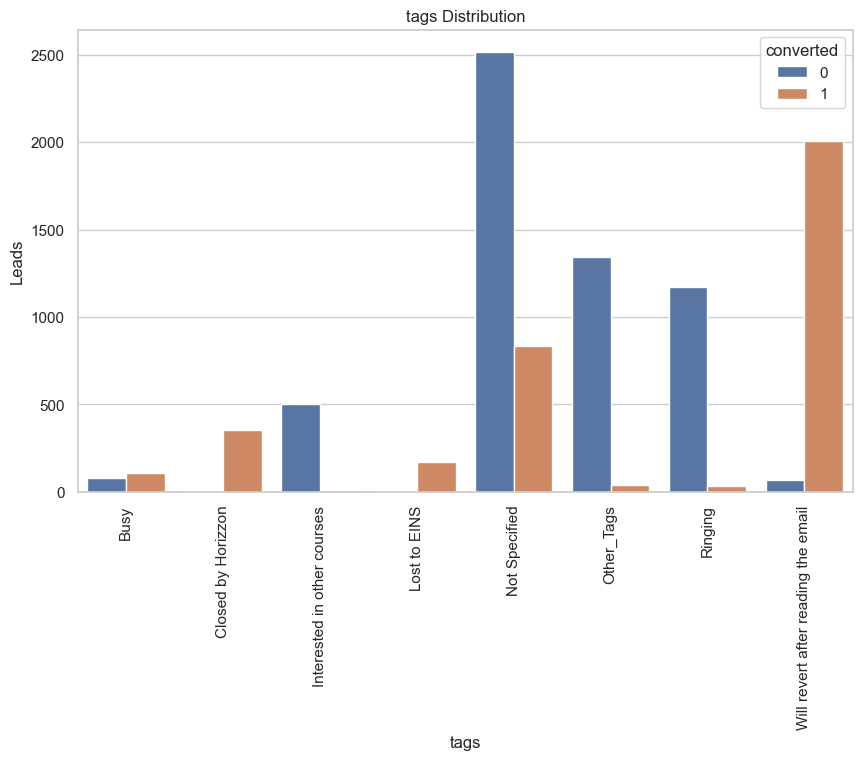

In [77]:
count_df = df.groupby(['tags', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='tags',y='Count',hue='converted',data=count_df)

plt.title('tags Distribution')
plt.xlabel('tags')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

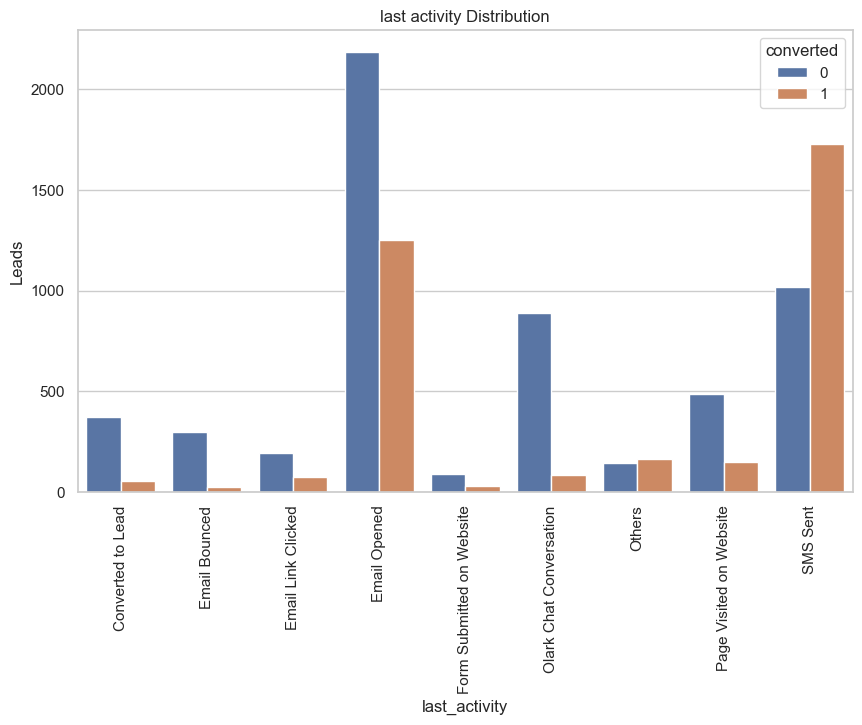

In [78]:
count_df = df.groupby(['last_activity', 'converted']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='last_activity',y='Count',hue='converted',data=count_df)

plt.title('last activity Distribution')
plt.xlabel('last_activity')
plt.ylabel('Leads')
plt.xticks(rotation=90)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Numerical Variables

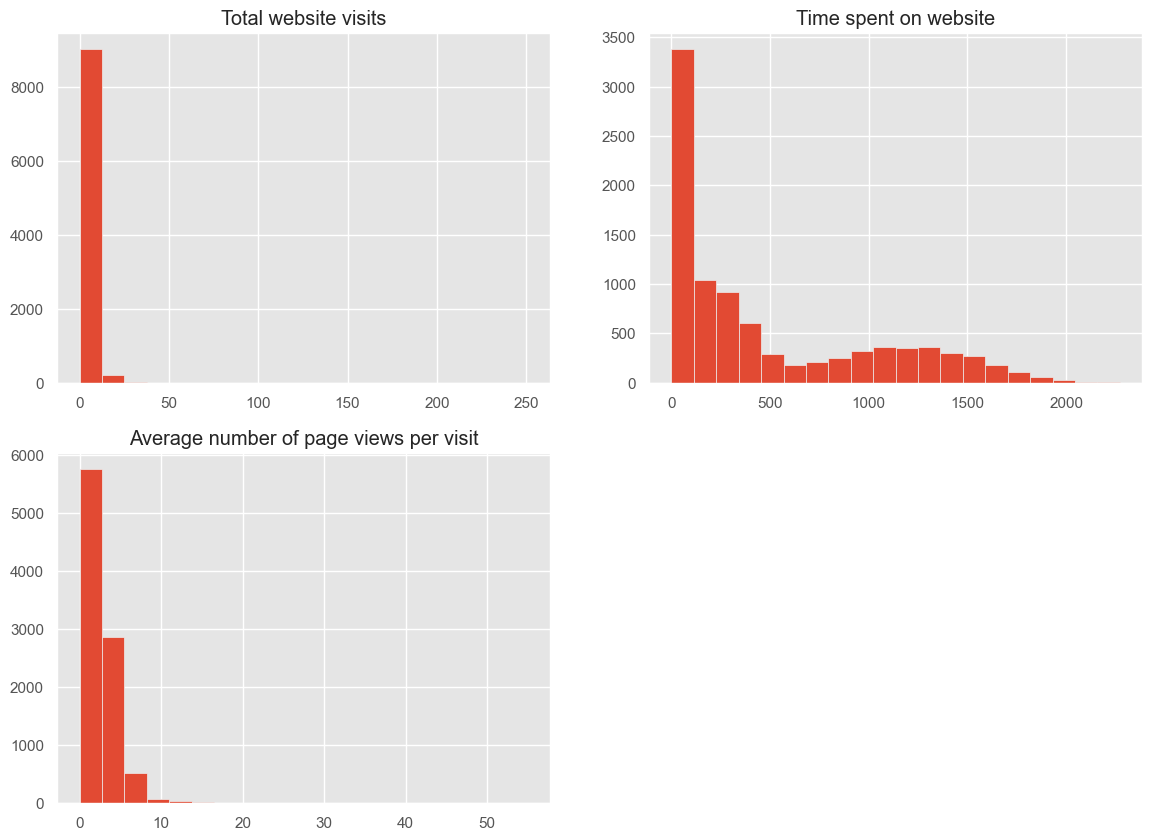

In [79]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

Lot of skewness in these variables. Lets boxplot them to check for outliers

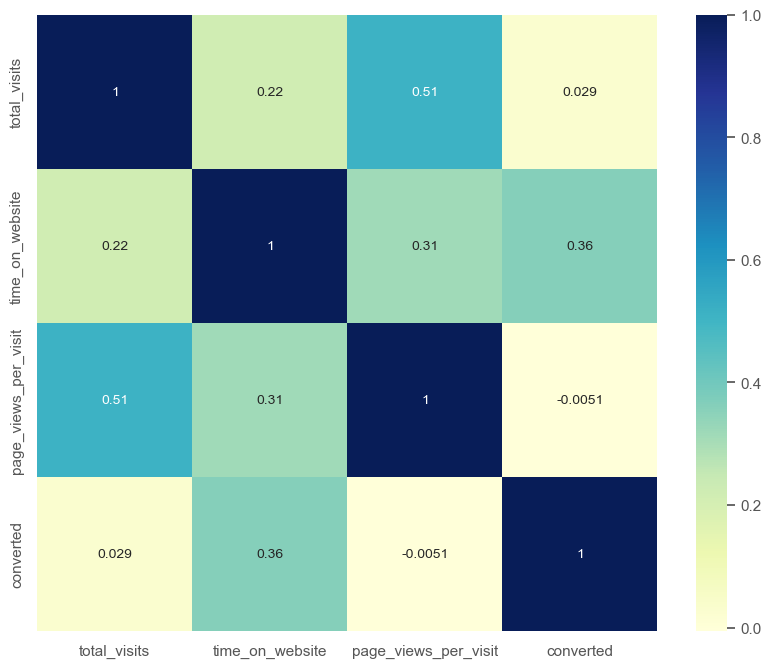

In [80]:
plt.figure(figsize = (10,8))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit','converted']].corr(), cmap="YlGnBu", annot = True)
plt.show()

No significant correlation

In [81]:
df['time_on_website'].describe()

count   9240.00
mean     487.70
std      548.02
min        0.00
25%       12.00
50%      248.00
75%      936.00
max     2272.00
Name: time_on_website, dtype: float64

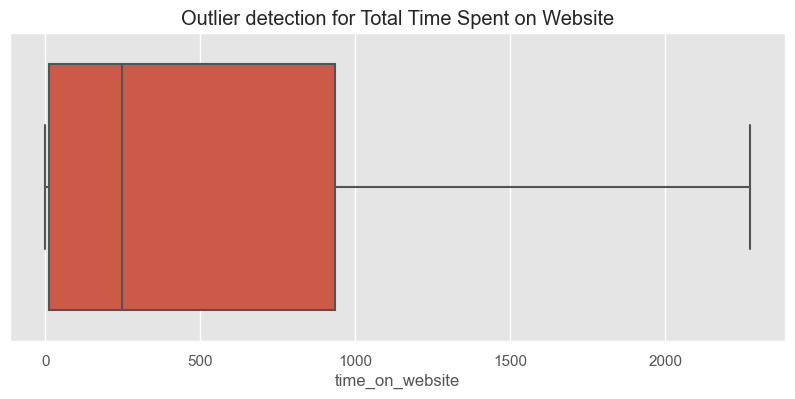

In [82]:
plt.figure(figsize=(10,4))

sns.boxplot(x=df['time_on_website'])

plt.title('Outlier detection for Total Time Spent on Website')
plt.show()

no outlier seen on this variable

In [83]:
df['total_visits'].describe()

count   9240.00
mean       3.44
std        4.82
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: total_visits, dtype: float64

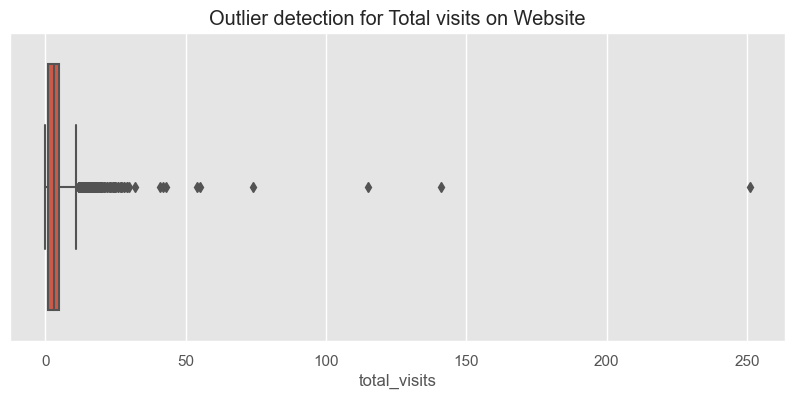

In [84]:
plt.figure(figsize=(10,4))

sns.boxplot(x=df['total_visits'])

plt.title('Outlier detection for Total visits on Website')
plt.show()

Examining both the box plots and the statistics, it’s clear that there are upper bound outliers in the columns for total_visits and page_views_per_visit. Additionally, it’s evident that the data can be capped at the 99th percentile.

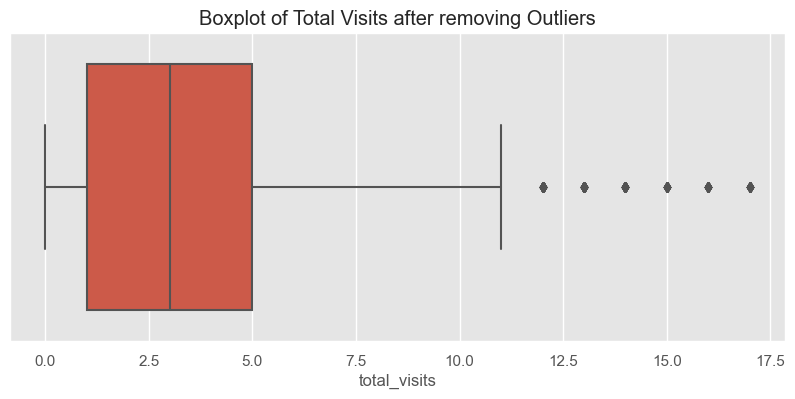

In [85]:
plt.figure(figsize=(10,4))

Q3 = df['total_visits'].quantile(0.99)

df = df[(df['total_visits'] <= Q3)]

Q1 = df['total_visits'].quantile(0.01)

df = df[(df['total_visits'] >= Q1)]

sns.boxplot(x=df['total_visits'])
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [86]:
df['page_views_per_visit'].describe()

count   9157.00
mean       2.33
std        2.05
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: page_views_per_visit, dtype: float64

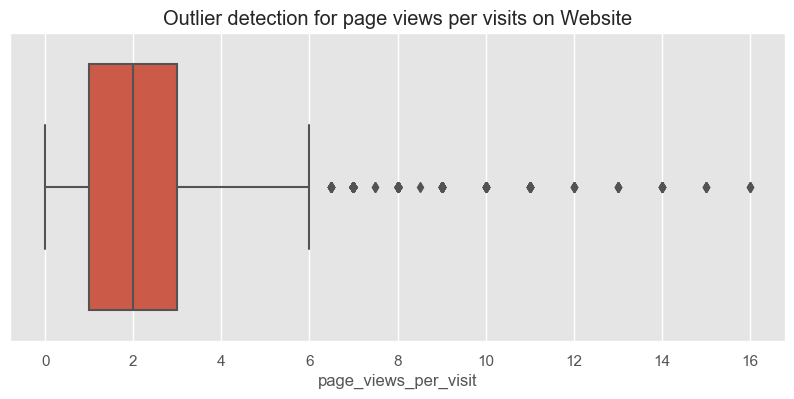

In [87]:
plt.figure(figsize=(10,4))

sns.boxplot(x=df['page_views_per_visit'])

plt.title('Outlier detection for page views per visits on Website')
plt.show()

Given the presence of outliers in the data, we need to address them by capping the values at the 1st percentile.

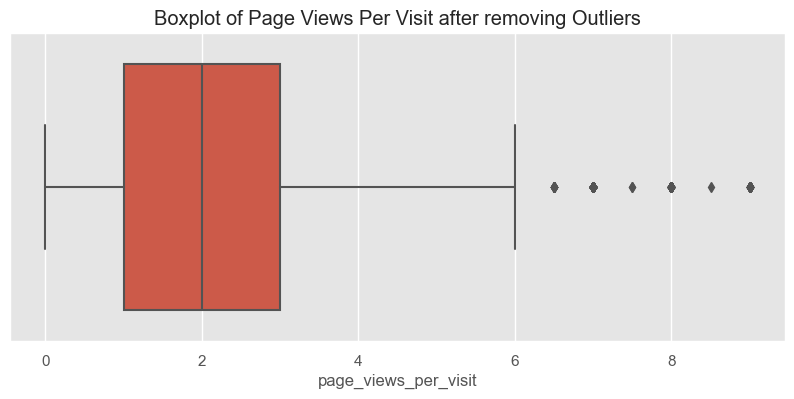

In [88]:

plt.figure(figsize=(10,4))

Q3 = df['page_views_per_visit'].quantile(0.99)

df = df[(df['page_views_per_visit'] <= Q3)]

Q1 = df['page_views_per_visit'].quantile(0.01)

df = df[(df['page_views_per_visit'] >= Q1)]

sns.boxplot(x=df['page_views_per_visit'])
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()

In [89]:
df.isnull().sum()

lead_number              0
lead_origin              0
lead_source              0
do_not_email             0
converted                0
total_visits             0
time_on_website          0
page_views_per_visit     0
last_activity            0
specialization           0
occupation               0
tags                     0
city                     0
mastering_interview      0
last_notable_activity    0
dtype: int64

### Model Preparation

Mapping binary values to 0 and 1

In [90]:
df.groupby('do_not_email')['lead_number'].count()

do_not_email
No     8383
Yes     707
Name: lead_number, dtype: int64

In [91]:
col_list = ['do_not_email', 'mastering_interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[col_list] = df[col_list].apply(binary_map)

df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,city,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,0,0,0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [92]:
categorical_vals= df.select_dtypes(include=['object']).columns
categorical_vals

Index(['lead_number', 'lead_origin', 'lead_source', 'last_activity',
       'specialization', 'occupation', 'tags', 'city',
       'last_notable_activity'],
      dtype='object')

create dummy variables for all except lead number

In [93]:
# dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)
# dummy1 = dummy1.astype(int)
# df = pd.concat([df, dummy1], axis=1)

In [94]:
dummy = pd.get_dummies(df[['lead_origin','occupation',
                             'city']], drop_first=True)
dummy = dummy.astype(int)
df = pd.concat([df,dummy],axis=1)

In [95]:
dummy = pd.get_dummies(df['specialization'], prefix  = 'specialization')
dummy = dummy.drop(['specialization_Not Specified'], axis=1)
dummy = dummy.astype(int)
df = pd.concat([df,dummy],axis=1)

In [96]:
dummy = pd.get_dummies(df['lead_source'], prefix  = 'lead_source')
dummy = dummy.drop(['lead_source_Others'], axis = 1)
dummy = dummy.astype(int)
df = pd.concat([df, dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(df['last_activity'], prefix  = 'last_activity')
dummy = dummy.drop(['last_activity_Others'], axis = 1)
dummy = dummy.astype(int)
df = pd.concat([df, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(df['last_notable_activity'], prefix  = 'last_notable_activity')
dummy = dummy.drop(['last_notable_activity_Other_Notable_activity'], axis = 1)
dummy = dummy.astype(int)
df = pd.concat([df, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(df['tags'], prefix  = 'tags')
dummy = dummy.drop(['tags_Not Specified'], axis = 1)
dummy = dummy.astype(int)
df = pd.concat([df, dummy], axis = 1)

In [100]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,city,mastering_interview,last_notable_activity,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,660737,API,Olark Chat,0,0,0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,5,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


drop original column

In [101]:
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city','last_activity','last_notable_activity','tags','do_not_email','mastering_interview'], axis = 1, inplace = True)
df.head()

,lead_number,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,660737,0,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,660728,0,5,674,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2,1532,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,305,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [102]:
df.shape

(9090, 65)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   lead_number                                       9090 non-null   object 
 1   converted                                         9090 non-null   int64  
 2   total_visits                                      9090 non-null   int32  
 3   time_on_website                                   9090 non-null   int64  
 4   page_views_per_visit                              9090 non-null   float64
 5   lead_origin_Landing Page Submission               9090 non-null   int32  
 6   lead_origin_Lead Add Form and Others              9090 non-null   int32  
 7   occupation_Housewife                              9090 non-null   int32  
 8   occupation_Other                                  9090 non-null   int32  
 9   occupation_Student      

#### Lets Start building the model

Train test split

In [104]:
X = df.drop(['lead_number', 'converted'], axis=1)

X.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
0,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5,674,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,1532,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,305,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [105]:
# Target variable
y = df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [107]:
X_train.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
302,7,250,2.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6087,0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1033,5,470,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7656,6,352,6.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3241,4,973,1.33,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [108]:
X_test.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
6906,4,1530,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1873,2,186,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
771,7,49,7.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4495,4,144,4.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9061,2,1788,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [109]:
y_train.head()

302     0
6087    0
1033    0
7656    0
3241    1
Name: converted, dtype: int64

In [110]:
y_test.head()

6906    1
1873    0
771     0
4495    0
9061    1
Name: converted, dtype: int64

In [111]:
X_train.shape

(6363, 63)

In [112]:
X_test.shape

(2727, 63)

In [113]:
y_train.shape

(6363,)

In [114]:
y_test.shape

(2727,)

#### Feature Scaling

In [115]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,lead_source_Direct Traffic,lead_source_Google,lead_source_Live Chat,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_SMS Sent,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Lost to EINS,tags_Other_Tags,tags_Ringing,tags_Will revert after reading the email
302,1.34,-0.43,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6087,-1.09,-0.89,-1.21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1033,0.64,-0.03,1.48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7656,0.99,-0.24,2.01,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3241,0.29,0.90,-0.49,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


#### Model Building

In [116]:
# Logistic regression model
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 # running RFE with 15 variables 
rfe = RFE(logreg, n_features_to_select=15)    
rfe = rfe.fit(X_train, y_train)

In [117]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True])

In [118]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('total_visits', False, 27),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 28),
 ('lead_origin_Landing Page Submission', False, 11),
 ('lead_origin_Lead Add Form and Others', True, 1),
 ('occupation_Housewife', False, 21),
 ('occupation_Other', False, 38),
 ('occupation_Student', False, 14),
 ('occupation_Unemployed', False, 7),
 ('occupation_Working Professional', False, 40),
 ('city_Other Cities', False, 24),
 ('city_Other Cities of Maharashtra', False, 48),
 ('city_Other Metro Cities', False, 19),
 ('city_Thane & Outskirts', False, 46),
 ('city_Tier II Cities', False, 20),
 ('specialization_Banking, Investment And Insurance', False, 41),
 ('specialization_Business Administration', False, 47),
 ('specialization_E-Business', False, 45),
 ('specialization_E-COMMERCE', False, 13),
 ('specialization_Finance Management', False, 29),
 ('specialization_Healthcare Management', False, 30),
 ('specialization_Hospitality Management', False, 12),
 ('specialization_Human Resour

In [119]:
# checking the rfe Supported columns
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['time_on_website', 'lead_origin_Lead Add Form and Others',
       'lead_source_Social Media', 'lead_source_Welingak Website',
       'last_activity_Email Bounced', 'last_activity_SMS Sent',
       'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_SMS Sent', 'tags_Closed by Horizzon',
       'tags_Interested in other courses', 'tags_Lost to EINS',
       'tags_Other_Tags', 'tags_Ringing',
       'tags_Will revert after reading the email'],
      dtype='object')

In [120]:
# listing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['total_visits', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional', 'city_Other Cities',
       'city_Other Cities of Maharashtra', 'city_Other Metro Cities',
       'city_Thane & Outskirts', 'city_Tier II Cities',
       'specialization_Banking, Investment And Insurance',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_Finance Management',
       'specialization_Healthcare Management',
       'specialization_Hospitality Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_International Business',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management',
       'specialization_Retai

In [121]:
#Model building

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.6
Date:                Tue, 20 Aug 2024   Deviance:                       2541.2
Time:                        01:01:15   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6056
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3410      0.084    -16.017      0.000      -1.505      -1.177
time_on_website                                   0.8627      0.052     16.545      0.000       0.760       0.965
lead_origin_Lead Add Form and Others              1.5001      0.351      4.273      0.000       0.812       2.188
lead_source_Social Media                         -1.2335      0.758     -1.626      0.104      -2.720       0.253
lead_source_Welingak Website                      4.4322      1.077      4.117      0.000       2.322       6.542
last_activity_Email Bounced                      -1.6593      0.487     -3.407      0.001      -2.614      -0.705
last_activity_SMS Sent                            0.9805      0.223      4.387      0.000       0.542       1.419
last_notable_activity_Modified                   -1.2708      0.154     -8.266      0.000      -1.572      -0.970
last_notable_activity_Olark Chat Conversation    -1.4086      0.435     -3.238      0.001      -2.261      -0.556
last_notable_activity_SMS Sent                    1.1729      0.259      4.535      0.000       0.666       1.680
tags_Closed by Horizzon                           6.2959      0.731      8.613      0.000       4.863       7.729
tags_Interested in other courses                 -2.1798      0.411     -5.298      0.000      -2.986      -1.373
tags_Lost to EINS                                 6.2217      0.739      8.424      0.000       4.774       7.669
tags_Other_Tags                                  -2.8163      0.228    -12.342      0.000      -3.264      -2.369
tags_Ringing                                     -3.4695      0.233    -14.896      0.000      -3.926      -3.013
tags_Will revert after reading the email          4.1393      0.169     24.492      0.000       3.808       4.471
=================================================================================================================
"""

When evaluating RFE, we should remove the variable with the highest p-value. In this case, the variable lead source Social Media has the highest p-value in the table and should be excluded from further analysis.

In [122]:
rfe_support_col = rfe_support_col.drop(['lead_source_Social Media'],1)

In [123]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.0
Date:                Tue, 20 Aug 2024   Deviance:                       2544.1
Time:                        01:01:15   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3456      0.084    -16.077      0.000      -1.510      -1.182
time_on_website                                   0.8629      0.052     16.534      0.000       0.761       0.965
lead_origin_Lead Add Form and Others              1.2739      0.311      4.099      0.000       0.665       1.883
lead_source_Welingak Website                      4.6647      1.064      4.385      0.000       2.580       6.750
last_activity_Email Bounced                      -1.6571      0.489     -3.387      0.001      -2.616      -0.698
last_activity_SMS Sent                            0.9614      0.223      4.314      0.000       0.525       1.398
last_notable_activity_Modified                   -1.2698      0.154     -8.255      0.000      -1.571      -0.968
last_notable_activity_Olark Chat Conversation    -1.4071      0.436     -3.230      0.001      -2.261      -0.553
last_notable_activity_SMS Sent                    1.1965      0.258      4.636      0.000       0.691       1.702
tags_Closed by Horizzon                           6.3746      0.730      8.726      0.000       4.943       7.806
tags_Interested in other courses                 -2.1712      0.412     -5.276      0.000      -2.978      -1.365
tags_Lost to EINS                                 6.2340      0.738      8.445      0.000       4.787       7.681
tags_Other_Tags                                  -2.8128      0.228    -12.328      0.000      -3.260      -2.366
tags_Ringing                                     -3.4623      0.232    -14.896      0.000      -3.918      -3.007
tags_Will revert after reading the email          4.1575      0.169     24.599      0.000       3.826       4.489
=================================================================================================================
"""

Since all the variables now have p-values of 0, we should next examine the Variance Inflation Factor (VIF) to check for any correlations between the variables.

### VIF

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,last_notable_activity_SMS Sent,6.05
4,last_activity_SMS Sent,5.92
5,last_notable_activity_Modified,1.79
1,lead_origin_Lead Add Form and Others,1.71
13,tags_Will revert after reading the email,1.56
2,lead_source_Welingak Website,1.28
8,tags_Closed by Horizzon,1.27
0,time_on_website,1.18
11,tags_Other_Tags,1.18
9,tags_Interested in other courses,1.13


The VIF values are high for two variables so we have to remove them before doing the predictions on the train data

In [125]:
#Removing variable with high VIF Value

rfe_support_col = rfe_support_col.drop(['last_notable_activity_SMS Sent','last_activity_SMS Sent'],1)

In [126]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302    0.15
6087   0.01
1033   0.20
7656   0.05
3241   1.00
5738   0.11
7366   0.00
3680   0.04
4170   1.00
43     0.15
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15245018, 0.00644435, 0.20306276, 0.05424173, 0.99680924,
       0.11314476, 0.00203795, 0.04047622, 0.99657987, 0.14681106])

In [128]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.15,302
1,0,0.01,6087
2,0,0.20,1033
3,0,0.05,7656
4,1,1.00,3241


In [129]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.15,302,0
1,0,0.01,6087,0
2,0,0.20,1033,0
3,0,0.05,7656,0
4,1,1.00,3241,1


We can now evaluate the model's performance by examining the confusion matrix.

In [130]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3737  198]
 [ 277 2151]]


In [131]:
# overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9253496778249254


In [132]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [133]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2151
True negatives is  3737
False positives is  198
False negatives is  277


Prediction of the model is good now lets go ahead and perform the sensitivity and specificity

In [134]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print(Sensitivity)

88.59


In [135]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print(Specificity)

94.97


In [136]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.05031766200762389


In [137]:
print (TP / float(TP+FP))

0.9157088122605364


In [138]:
print (TN / float(TN+ FN))

0.9309915296462382


### ROC Curve

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

<Figure size 1500x1500 with 0 Axes>

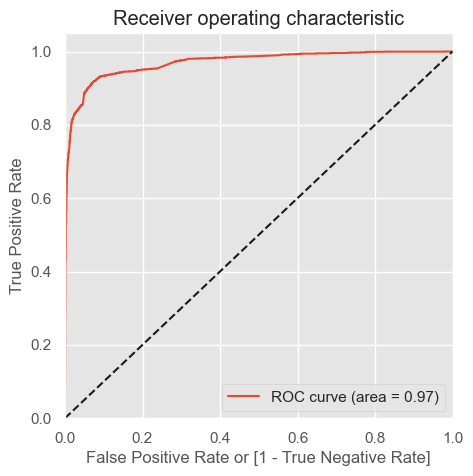

In [141]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

The ROC Curve is close to 1 indicating a good prediction model

In [142]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.15,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.01,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.20,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.05,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,1.00,3241,1,1,1,1,1,1,1,1,1,1,1


In [143]:
# Accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.81   0.97   0.71
0.20  0.20      0.91   0.93   0.90
0.30  0.30      0.92   0.92   0.93
0.40  0.40      0.93   0.90   0.94
0.50  0.50      0.93   0.89   0.95
0.60  0.60      0.92   0.84   0.97
0.70  0.70      0.92   0.82   0.98
0.80  0.80      0.91   0.79   0.98
0.90  0.90      0.89   0.71   0.99


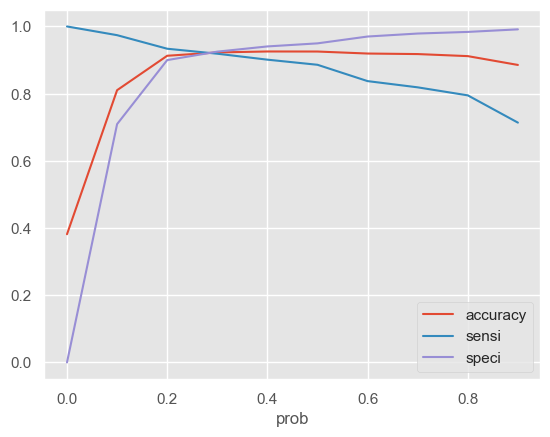

In [144]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.15,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.01,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.20,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.05,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1.00,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.15,302,0,15
1,0,0.01,6087,0,1
2,0,0.20,1033,0,20
3,0,0.05,7656,0,5
4,1,1.00,3241,1,100


In [147]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9226779820839227

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3640,  295],
       [ 197, 2231]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9188632619439868

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9250317662007624

The model is performing well, with an ROC curve value of 0.97, and train data metrics including 92% accuracy, 92% sensitivity, and 93% specificity, alongside other statistics such as false positive rate, positive predictive value, negative predictive value, precision, and recall.

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07496823379923762


In [153]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8832145684877276


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9486578055772739


In [155]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3640,  295],
       [ 197, 2231]], dtype=int64)

In [156]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8832145684877276

In [157]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9188632619439868

In [158]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8832145684877276

In [159]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9188632619439868

In [160]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

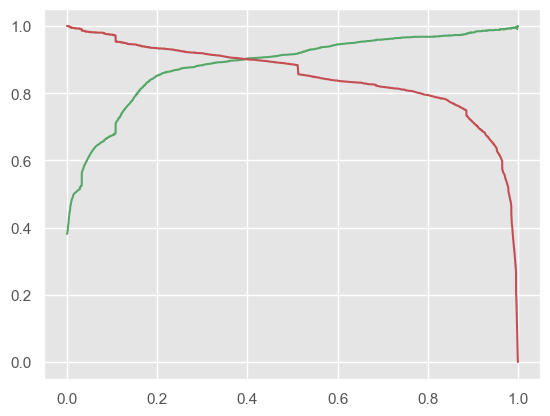

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

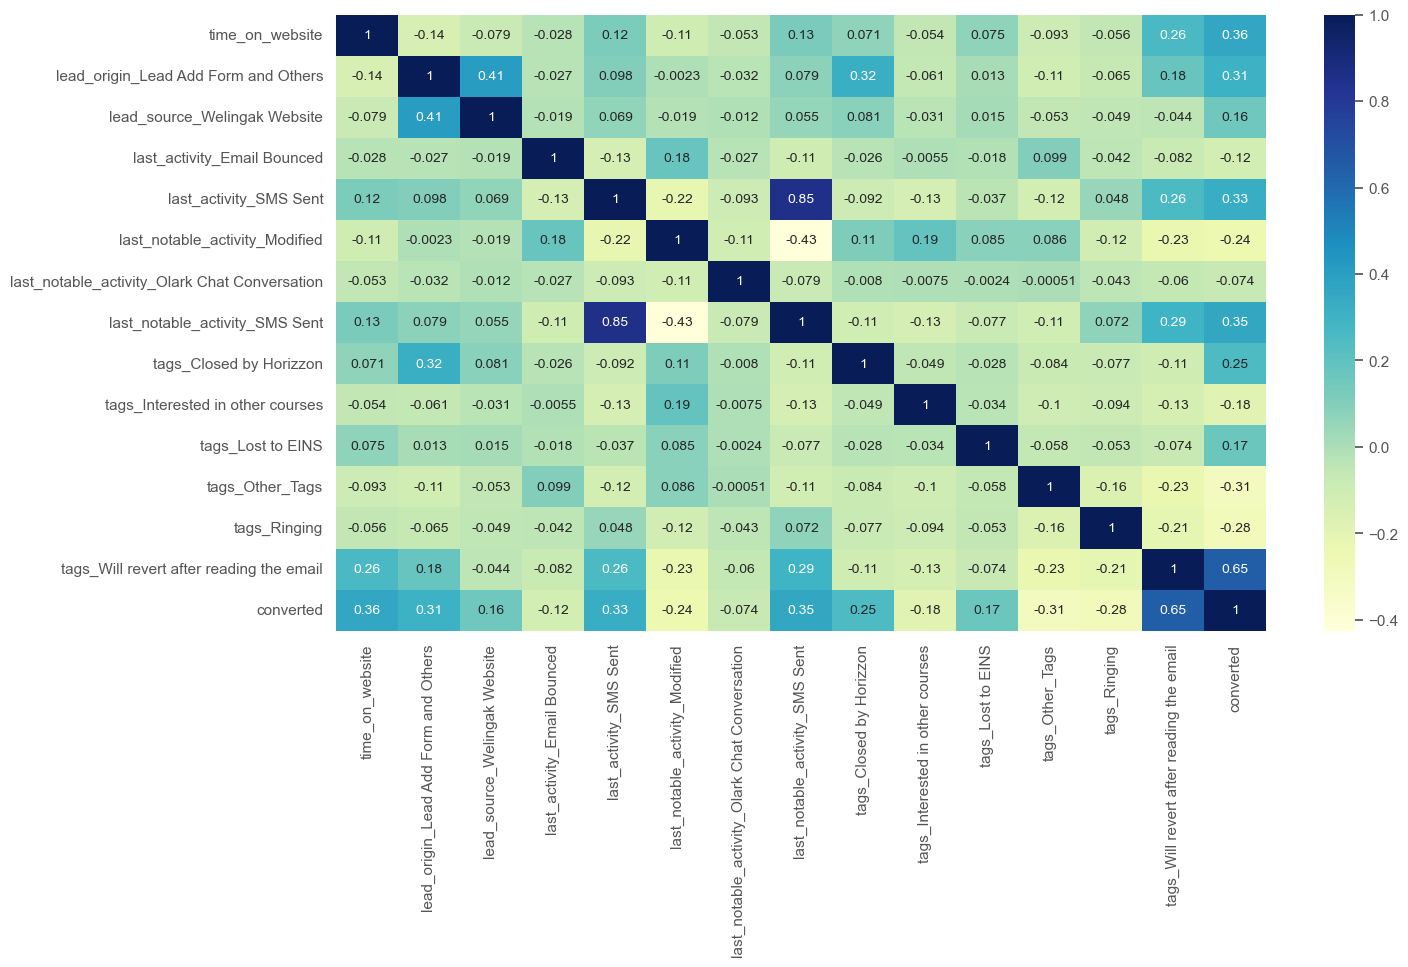

In [162]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = ['time_on_website', 'lead_origin_Lead Add Form and Others',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_SMS Sent', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_SMS Sent', 'tags_Closed by Horizzon',
       'tags_Interested in other courses', 'tags_Lost to EINS',
       'tags_Other_Tags', 'tags_Ringing',
       'tags_Will revert after reading the email']
col.append('converted')
plt.figure(figsize=(15, 8))
sns.heatmap(df[col].corr(), cmap="YlGnBu",annot=True)
plt.show()

Top variables that contribute to the model -  rever after reading the email, total time spend on website, last notable activity SMS sent

### PREDICTIONS ON TEST SET

In [163]:
print(X_train_sm.columns)

Index(['const', 'time_on_website', 'lead_origin_Lead Add Form and Others',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_SMS Sent', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_SMS Sent', 'tags_Closed by Horizzon',
       'tags_Interested in other courses', 'tags_Lost to EINS',
       'tags_Other_Tags', 'tags_Ringing',
       'tags_Will revert after reading the email'],
      dtype='object')


In [164]:
#scaling test set
col_list = ['time_on_website', 'lead_origin_Lead Add Form and Others',
       'lead_source_Welingak Website', 'last_activity_Email Bounced',
       'last_activity_SMS Sent', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_SMS Sent', 'tags_Closed by Horizzon',
       'tags_Interested in other courses', 'tags_Lost to EINS',
       'tags_Other_Tags', 'tags_Ringing',
       'tags_Will revert after reading the email']
X_test = X_test[col_list]
X_test= scaler.fit_transform(X_test)
X_test_sm = sm.add_constant(X_test)

In [165]:
print(X_test_sm.shape) 

(2727, 15)


In [166]:
print(X_train_sm.shape) 

(6363, 15)


In [167]:
y_test_pred = res.predict(X_test_sm)

In [168]:
y_test_pred[:10]

array([9.99998032e-01, 1.68020936e-06, 5.78625390e-07, 6.71248308e-07,
       1.00000000e+00, 6.64036596e-03, 2.05937069e-03, 1.19084279e-03,
       5.75019137e-07, 9.64389905e-01])

In [169]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [170]:
y_pred_1.head()

,0
0,1.00
1,0.00
2,0.00
3,0.00
4,1.00


In [171]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [172]:
# Putting CustID to index
y_test_df['lead_number'] = y_test_df.index

In [173]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [175]:
y_pred_final.head()

,converted,lead_number,0
0,1,6906,1.00
1,0,1873,0.00
2,0,771,0.00
3,0,4495,0.00
4,1,9061,1.00


In [176]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [177]:
y_pred_final.head()

,converted,lead_number,Converted_prob
0,1,6906,1.00
1,0,1873,0.00
2,0,771,0.00
3,0,4495,0.00
4,1,9061,1.00


In [178]:
# Rearranging the columns
y_pred_final = y_pred_final[['lead_number','converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [179]:
y_pred_final.head()

,lead_number,converted,Converted_prob,Lead_Score
0,6906,1,1.00,100
1,1873,0,0.00,0
2,771,0,0.00,0
3,4495,0,0.00,0
4,9061,1,1.00,100


In [180]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [181]:
y_pred_final.head()

,lead_number,converted,Converted_prob,Lead_Score,final_Predicted
0,6906,1,1.00,100,1
1,1873,0,0.00,0,0
2,771,0,0.00,0,0
3,4495,0,0.00,0,0
4,9061,1,1.00,100,1


In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.9207920792079208

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_Predicted )
confusion2

array([[1595,   65],
       [ 151,  916]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8584817244611059

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608433734939759

In [187]:
precision_score(y_pred_final.converted , y_pred_final.final_Predicted)

0.9337410805300713

In [188]:
recall_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.8584817244611059

Both the test and train dataset have very good accuracy; thus the performance of the model is good.

To enhance the overall conversion rate, X Education Company should focus on the following key areas:

1. Boost user engagement on their website to drive higher conversion rates.
2. Increase the frequency of SMS notifications as this contributes to better conversion outcomes.
3. Raise TotalVisits through advertising and other strategies to improve conversion rates.